In [2]:
# import the necessary tools 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [3]:
#read and display the dataset
df = pd.read_csv('titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.info() #investigate the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


OVERALL THE DATA DATAFRAME LOOKS CLEAN JUST THOSE TWO COLUMN AGE AND CABIN. ESPECIALLY CABIN

SO I THINK THE CABIN COLUMN DOESN'T HAVE ENOUGH DATA THAT OUR MODEL CAN LEARn FROM, FOR THAT WE'RE GOING TO DROP THAT COLUMN 

AND MAYBE DROP THE ROWS WITH MISSING DATA IN AGE COLUMn


In [5]:
df.drop("Cabin", axis= 1, inplace=True)

In [6]:
#over here droppin any missing value
df.dropna(how='any', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


### now onto a short viz for a short summary of the Dataset (particularly the categorical var)

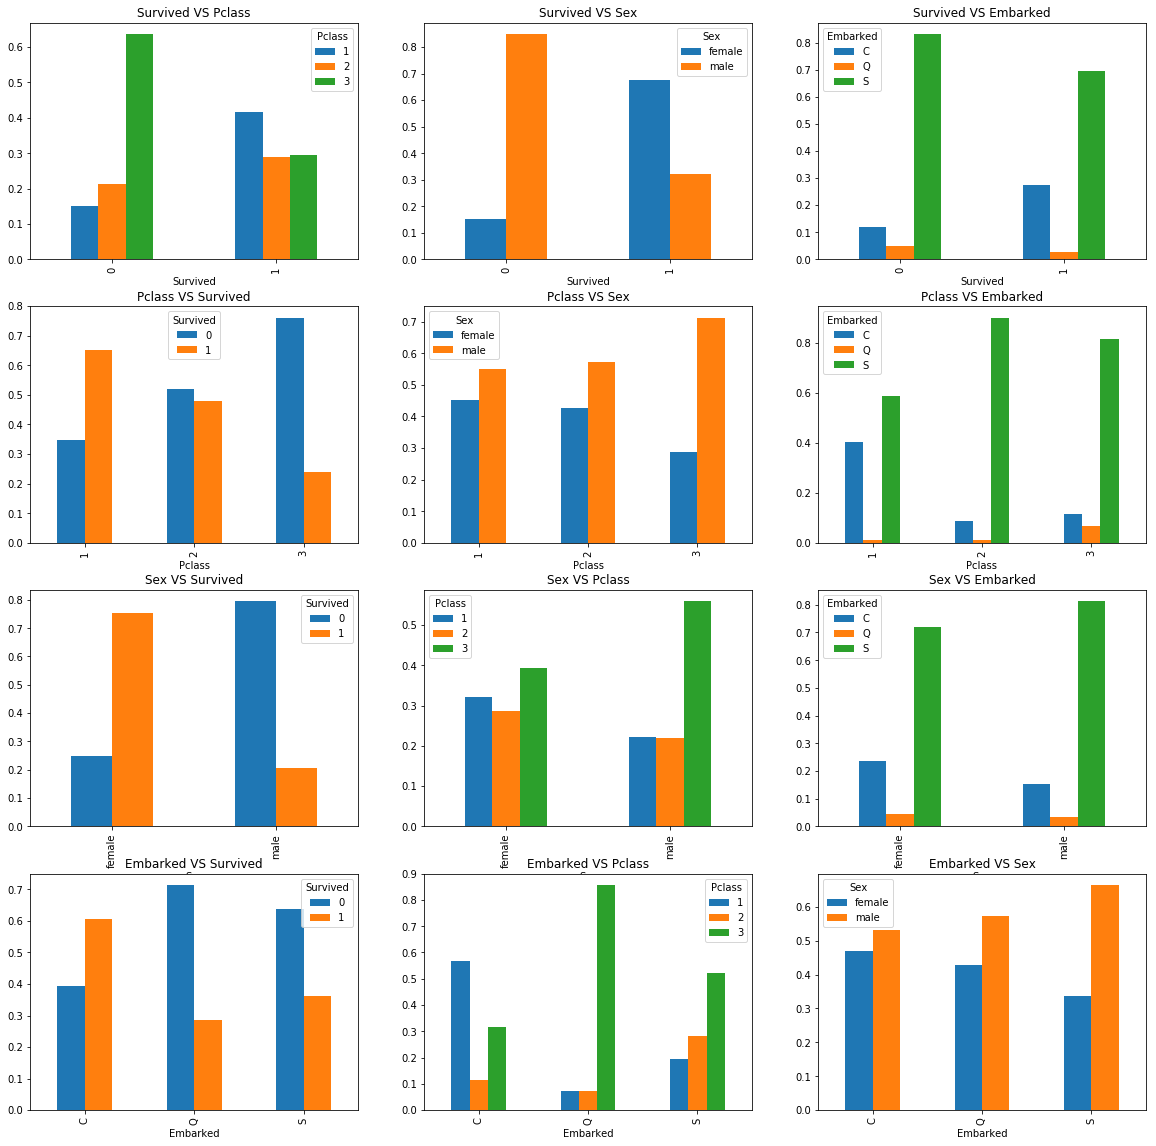

In [7]:
# select the columns (categical values) 
cols = ['Survived','Pclass', 'Sex', 'Embarked']
a = 0 #this var will serve as a graph location
plt.figure(figsize=(20,20))#set the canvas
for group in cols:#we interating through the categorical(that can help with group the data) values that can serve as y axis
    for i, e in zip(cols, range(1,len(cols)+1)):    #and the second loop will get us the location of the graph and the x axis value
        if group != i: #here we check if the group and i (which are values coming from the same list) we check if they are not the same
            
            
            #we use a variable that we created for graph location purpose and increment it to one before ploting
            a += 1
            
            #we set the ax so that each graph behave in terms of location
            ax = plt.subplot(4,3,a)
            
            #and below we use the first iterator (group) to group the and the second iterator to select a colon in that group the count and normalize the values
            # and then we unstack it to prevent the bars from stacking on top of each other (prevent)
            df.groupby(group)[i].value_counts(normalize=True).unstack().plot(kind='bar', ax=ax)
            plt.title(group+' VS '+i) #and finaly set the title using our iterators
            

* **We can also convert all our categoricals variables to numbers so and  preparing the data**

In [8]:
# to prevent the changes that we gonna make to reflect in the original data we gonna make a copy of the datset
new_df = df.copy()
new_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [9]:
# convert Sex and Embarked to digits

for i in ['Sex', 'Embarked']:
    
    a = 0 #this is the digit we gonna use to replace the values in the two column
    
    print(i)   # print the column (just to keep tack of the process)
    
    for valu in new_df[i].sort_values().unique():   # now we get the unique values in the the selected column sort the  value 
                                                    #cause we don't want the values to be raplace randomly
            
            
        new_df.loc[new_df[i] == valu, i ] = a       # loc the rows tha have the selected value, then replace all those values by a variable
            
        print(valu,' = ',a)   #we display the results
        
        
        a +=1  # then we update the  variable a

Sex
female  =  0
male  =  1
Embarked
C  =  0
Q  =  1
S  =  2


In [10]:
#check our new df
new_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2

In [11]:
new_df.isnull().sum() #check if we have any missing value

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## splitting the data into train, dev, test

In [55]:
# we create a list of columns that we identify as independent variables 

independent = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

#get the x and y values y being our dependent var.
x = new_df.loc[:,independent].values
y = new_df.loc[:,'Survived'].values
print(y.shape, x.shape)

(712,) (712, 7)


## ● Split the data into a training, dev and test set.

### To accomplich that we use the train_test_split method twice

* First we split the train and test, giving the test set 40.
* Second we split the test set in half and give the other half to Dev set


In [57]:
# import the train_test_plit class from sklearn to help with the split of data
from sklearn.model_selection import train_test_split
#split the data into train and tes
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.40, random_state=1)

In [58]:
#then divide the test portion into 50/50 for our dev set
x_dev, x_test, y_dev, y_test = train_test_split(x_test,y_test, test_size= 0.50, random_state=1)

In [59]:
(x_dev.size/x.size), (x_test.size/x.size), (x_train.size/x.size)

(0.199438202247191, 0.20084269662921347, 0.5997191011235955)

## ● Training  the model

* Create a Decision Tree that can predict the survival of passengers. Without imposing any 
restrictions on the depth of the tree.

In [65]:
#import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#create our model and stabilized the random state
DecisionTreeClassifier(random_state = 1)
#train the model 
decision_model = DecisionTreeClassifier().fit(x_train, y_train)




0.7605633802816901

array([[65, 19],
       [15, 43]], dtype=int64)

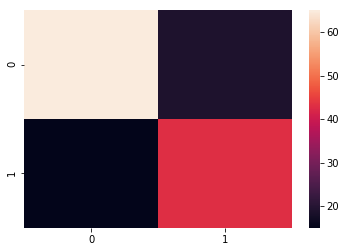

In [66]:
#predict or test our model on the dev set
predict1 = decision_model.predict(x_dev)
#compute the metric just  want to see what is patern
from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y_dev, predict1)
sns.heatmap(cm)#plot the matrix result
cm

In [67]:
#plot the decision tree
dot_data = StringIO()
#create a picture that will display our model performance or the background work
export_graphviz(decision_model, out_file = 'dot_data.dot', feature_names = independent,filled = True)
#import call and Image for picture
from subprocess import call
call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'dot_data.png')

In [75]:
#compute the model's accuracy on the development set a

#prediction = decision_model.predict(x_dev)
decision1 = decision_model.score(x_dev, y_dev)
decision1

0.7816901408450704

## Ploting 5  decision trees with a range of 2-10 max_depth

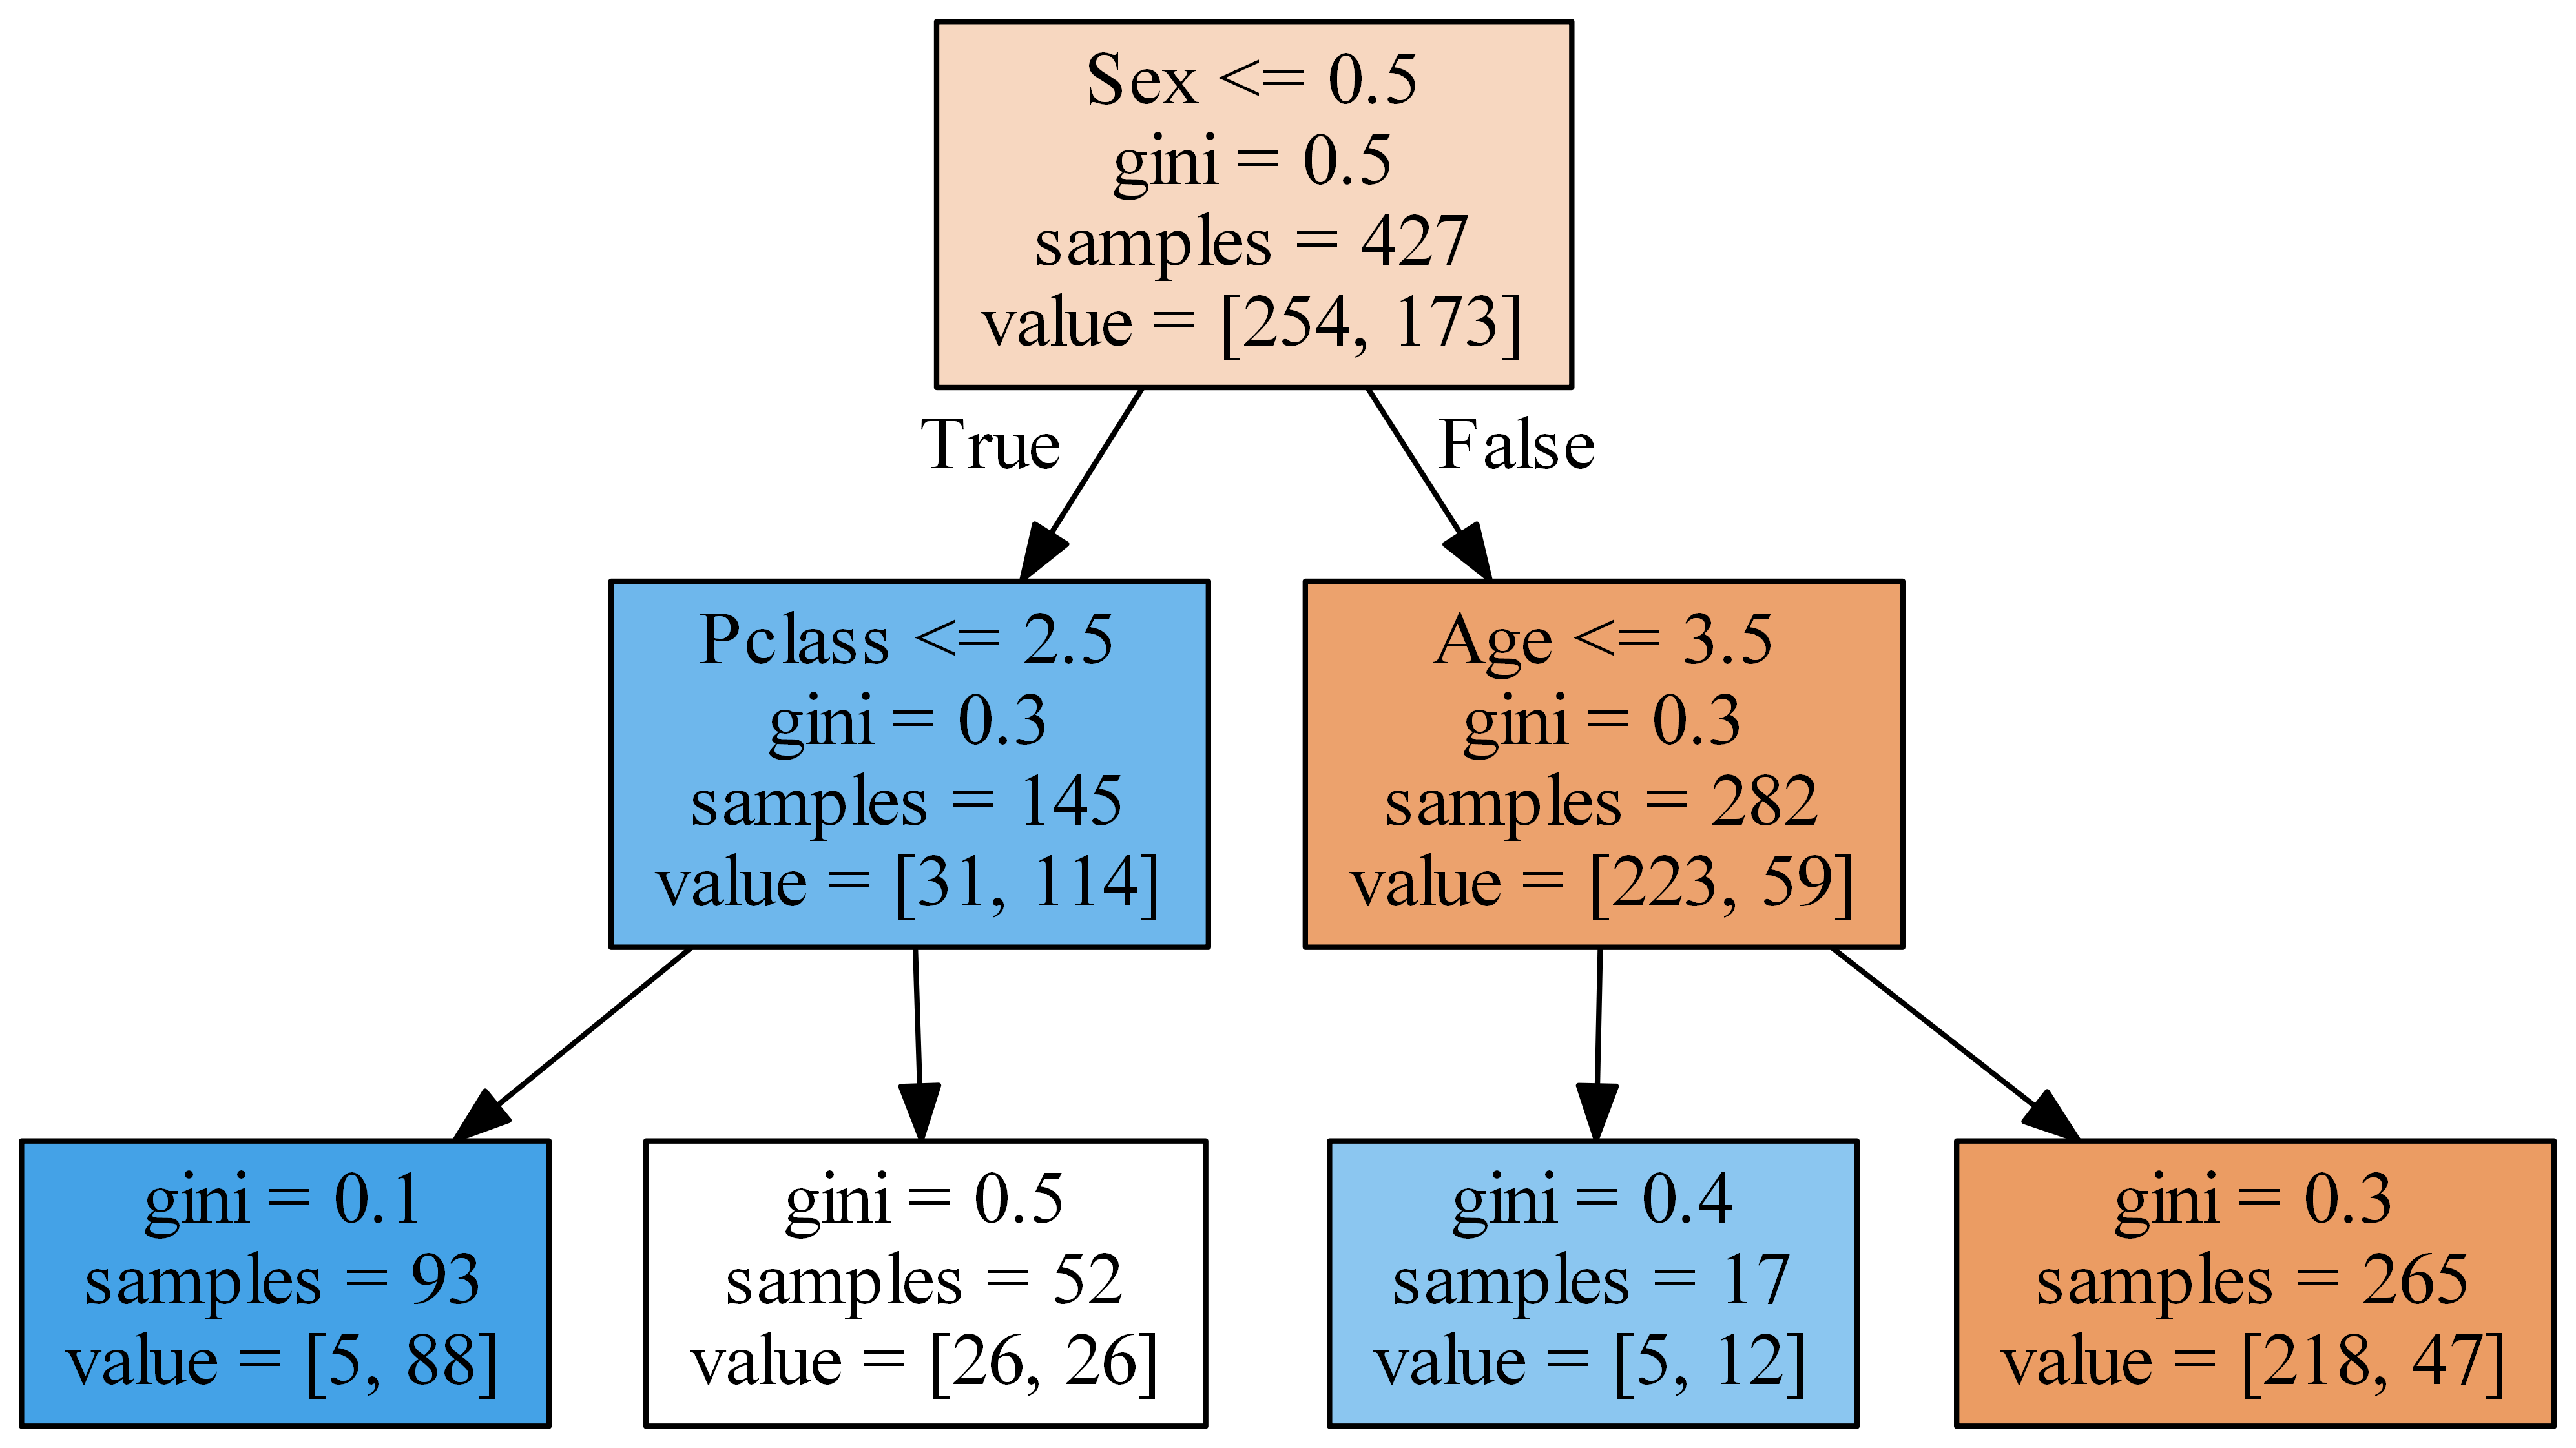

In [74]:
#create a model and set the random state (for consistant result)
DecisionTreeClassifier(random_state = 1)
#train the model
decision_model = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)
#test the model performance on the dev set
decision2 = decision_model.score(x_dev, y_dev)


#display the the decision patern
dot_data = StringIO()

export_graphviz(decision_model, out_file = 'dot_data.dot', feature_names = independent,filled = True, precision=True)

call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])

Image(filename = 'dot_data.png')


In [ ]:
#create a model
DecisionTreeClassifier(random_state = 1)
#train the model tweak depth of the tree to 4
decision_model = DecisionTreeClassifier(max_depth=4).fit(x_train, y_train)

#test the model on the dev set
decision2 = decision_model.score(x_dev, y_dev)
#plot a pic of the decision patern
dot_data = StringIO()

export_graphviz(decision_model, out_file = 'dot_data.dot', feature_names = independent,filled = True, precision=True)

call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])

Image(filename = 'dot_data.png')


## do the same as above but this time a bigger tree max_depth to 6

In [72]:
#create a model
DecisionTreeClassifier(random_state = 1)
#train the model tweak depth of the tree to 6
decision_model = DecisionTreeClassifier(max_depth=6).fit(x_train, y_train)

#test the model on the dev set
decision2 = decision_model.score(x_dev, y_dev)
#plot a pic of the decision patern
dot_data = StringIO()

export_graphviz(decision_model, out_file = 'dot_data.dot', feature_names = independent,filled = True, precision=True)

call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])

Image(filename = 'dot_data.png')


In [ ]:
decision2

In [ ]:
DecisionTreeClassifier

In [ ]:
decision3

In [ ]:
#create a model
DecisionTreeClassifier(random_state = 1)
#train the model tweak depth of the tree to 8
decision_model = DecisionTreeClassifier(max_depth=8).fit(x_train, y_train)

#test the model on the dev set
decision2 = decision_model.score(x_dev, y_dev)
#plot a pic of the decision patern
dot_data = StringIO()

export_graphviz(decision_model, out_file = 'dot_data.dot', feature_names = independent,filled = True, precision=True)

call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])

Image(filename = 'dot_data.png')


### our final test will be max_deth =10

In [12]:
#create a model
DecisionTreeClassifier(random_state = 1)
#train the model tweak depth of the tree to 10
decision_model = DecisionTreeClassifier(max_depth=10).fit(x_train, y_train)

#test the model on the dev set
decision2 = decision_model.score(x_dev, y_dev)
#plot a pic of the decision patern
dot_data = StringIO()

export_graphviz(decision_model, out_file = 'dot_data.dot', feature_names = independent,filled = True, precision=True)

call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])

Image(filename = 'dot_data.png')


NameError: name 'DecisionTreeClassifier' is not defined

## building 6 models, each model with a Max_depth ranging from 0-10, [None, 2,4,6,8,10] respectively (going wild)

In [83]:
depth = [None, 2,4,6,8,10] #we create a list of the of our tree and from none to 10 
x_  =  [x_train, x_dev]    #group the trai and dev set x axis and y axis together
y_  =  [y_train, y_dev]

#these two list will save the result of our models for the training and the test on dev set
train_list = []
dev_list =[]

#setting labels for our scores
identifier =  ['Training Accuracies', 'Development Accuracies']

#now we loop trough the x's and y's and their id's
for x, y, i in zip(x_, y_,  identifier):
    
    print('\n',i,'\n') # we print the id as the title of our algorithm
    
    #now here is where all the maggic is happening 
    # for each depth
    for d in depth:
        
        
        #we create a model for it and  stabilized the randomness for consistent result
        DecisionTreeClassifier(random_state = 1)
        
        #train the model of each depth
        decision_model = DecisionTreeClassifier(max_depth=d).fit(x_train, y_train)
        
        #get the score and print it
        decision = decision_model.score(x, y)
        print('Depth:',d,'\n', 'Accuracy:', decision)
        
        # now we want also to save our model so we say if it training put the result in the training list else put it dev set
        #we need these result for  our plot
        if i == 'Training Accuracies':
            train_list.append(decision)
        else:
            dev_list.append(decision)

       


 Training Accuracies 

Depth: None 
 Accuracy: 0.9929742388758782
Depth: 2 
 Accuracy: 0.8056206088992974
Depth: 4 
 Accuracy: 0.8548009367681498
Depth: 6 
 Accuracy: 0.8992974238875878
Depth: 8 
 Accuracy: 0.9297423887587822
Depth: 10 
 Accuracy: 0.955503512880562

 Development Accuracies 

Depth: None 
 Accuracy: 0.7535211267605634
Depth: 2 
 Accuracy: 0.7816901408450704
Depth: 4 
 Accuracy: 0.7605633802816901
Depth: 6 
 Accuracy: 0.7535211267605634
Depth: 8 
 Accuracy: 0.7887323943661971
Depth: 10 
 Accuracy: 0.7816901408450704


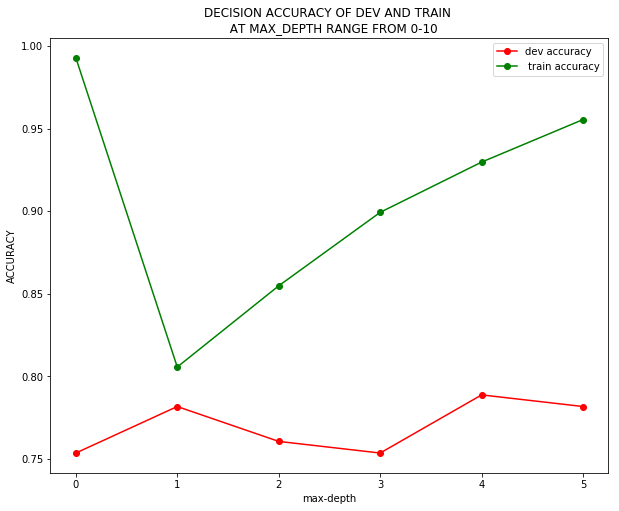

In [84]:
#let's now get a visual represent of our model and see which one we going to buy
plt.figure(figsize=(10,8))# as usual we set the canvas

#plot the the resulting lists

plt.plot(range(len(dev_list)),dev_list,color = 'r',marker = 'o', label='dev accuracy')
plt.plot(range(len(train_list)),train_list,color = 'g',marker = 'o',  label = ' train accuracy')

plt.title('DECISION ACCURACY OF DEV AND TRAIN \n  AT MAX_DEPTH RANGE FROM 0-10')
plt.xlabel('max-depth')
plt.ylabel('ACCURACY')
plt.legend()

Write down what shape the lines have and
what this shape means.
● Pick an optimum value for the max_depth parameter.
● Report the accuracy of your final model on the test data.

## Training line

* at index 0 [depth_max None] the model got it right like alomst 100%.
* then it drops vey badly when we specify the depth_max at 2 but as
* but as the depth_max increases we see that the model is picking up

## Development line

* The dev Line just  flatuates, but it shows the best performance at index 4 where the max_depth is set to 8.


So i think max_depth 8 is the one

In [85]:

DecisionTreeClassifier(random_state = 1)
        
decision_model = DecisionTreeClassifier(max_depth=8).fit(x_train, y_train)

decision = decision_model.score(x_test, y_test)
decision

0.8111888111888111

## 81% is not that bad

In [13]:
import random

In [28]:
random.randrange(12)

8